In [ ]:
!pip install nfl_data_py
!pip install pandas==1.5.3 numpy==1.24.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 381.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=

In [ ]:
import nfl_data_py as nfl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seasons = list(range(2010, 2025)) # 1999, 2024
df = nfl.import_pbp_data(seasons)

2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [ ]:
# Examine the dataset structure
print("Dataset structure:")
df.info()

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721564 entries, 0 to 721563
Columns: 392 entries, play_id to defense_coverage_type
dtypes: float32(205), int32(7), int64(1), object(179)
memory usage: 1.5+ GB


In [ ]:
# How many games
print(df['game_id'].nunique())

4078


In [ ]:
# Identify data types of columns
print("Data types:")
df.dtypes

Data types:


,0
play_id,float32
game_id,object
old_game_id,object
home_team,object
away_team,object
...,...
time_to_throw,float32
was_pressure,object
route,object
defense_man_zone_type,object


In [ ]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


,0
play_id,0
game_id,0
old_game_id,385989
home_team,0
away_team,0
...,...
time_to_throw,573110
was_pressure,573124
route,577798
defense_man_zone_type,610383


In [ ]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Summary statistics for numerical columns
print("Summary statistics:")
df.describe()

Summary statistics:


,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,xyac_success,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw
count,721564.000000,721564.000000,671604.000000,720988.000000,720988.000000,720988.000000,721564.000000,713208.000000,721564.000000,721564.000000,...,255244.000000,255245.000000,549118.000000,533980.000000,285748.000000,164926.000000,379533.000000,379533.000000,145058.000000,148454.000000
mean,2131.885010,9.583603,49.262234,414.118805,814.188599,1711.776978,0.017296,11.926804,0.074365,2.564912,...,0.791429,0.592615,0.620427,-0.242094,6.370676,4.234202,10.222360,10.216832,8.159682,2.745218
std,1249.452148,5.382180,24.743574,281.995270,558.479248,1058.300171,0.130190,6.940722,0.261617,1.131026,...,0.249134,0.357138,0.240555,41.872849,1.083272,0.879623,2.818799,2.817326,9.986072,1.028505
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.010676,-99.512955,0.000000,0.000000,0.000000,0.000000,-17.549999,0.033000
25%,1054.000000,5.000000,31.000000,151.000000,288.000000,795.000000,0.000000,6.000000,0.000000,2.000000,...,0.573965,0.244131,0.449677,-41.368652,6.000000,4.000000,11.000000,11.000000,1.730000,2.089000
50%,2119.000000,10.000000,51.000000,397.000000,804.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,0.986941,0.501353,0.584953,4.340238,6.000000,4.000000,11.000000,11.000000,5.530000,2.570000
75%,3177.000000,14.000000,70.000000,659.000000,1294.000000,2606.000000,0.000000,17.000000,0.000000,4.000000,...,1.000000,0.999215,0.848114,34.371033,7.000000,5.000000,11.000000,11.000000,12.910000,3.170000
max,5921.000000,22.000000,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,6.000000,...,1.000000,1.000000,0.998187,97.995056,11.000000,10.000000,21.000000,22.000000,65.000000,14.281000


In [ ]:
# Drop plays without a game_id or game result
df = df[df['game_id'].notna() & df['total_line'].notna()]

# Keep one row per game — last play
df_game = df.sort_values(by=['game_id', 'play_id']).groupby('game_id').last().reset_index()

# Use existing total scores
#df_game['total_score'] = df_game['home_score'] + df_game['away_score']
df_game['over'] = (df_game['total'] > df_game['total_line']).astype(int)

In [ ]:
# Create team-level game stats
team_games = df.groupby(['game_id', 'posteam'], as_index=False).agg({
    'posteam_score': 'last',
    'defteam_score': 'last',
    'div_game': 'last',
    # 'temp': 'last',
    # 'wind': 'last',
    'yards_gained': 'sum',
    'pass_attempt': 'sum',
    'rush_attempt': 'sum',
    'complete_pass': 'sum',
    'interception': 'sum',
    'touchdown': 'sum',
    'safety': 'sum',
    'tackled_for_loss': 'sum',
    'fumble_lost': 'sum',
    'qb_hit': 'sum',
    'sack': 'sum',
    'pass_touchdown': 'sum',
    'rush_touchdown': 'sum',
    'passing_yards': 'sum',
    'rushing_yards': 'sum',
    'fourth_down_failed': 'sum',
    'third_down_failed': 'sum',
    'fourth_down_converted': 'sum',
    'third_down_converted': 'sum',
    'aborted_play': 'sum',
    'out_of_bounds': 'sum',
    'penalty_yards': 'sum',
    'return_yards': 'sum',
    'punt_attempt': 'sum',
    'field_goal_attempt': 'sum',
    'two_point_attempt': 'sum',
    'shotgun': 'sum',
    'no_huddle': 'sum',
    'qb_dropback': 'sum',
    'qb_scramble': 'sum',
    'ydstogo': 'sum'
}).rename(columns={'posteam': 'team'})

# Add efficiency metrics
team_games['pass_yards_per_att'] = team_games['passing_yards'] / team_games['pass_attempt'].replace(0, np.nan)
team_games['rush_yards_per_att'] = team_games['rushing_yards'] / team_games['rush_attempt'].replace(0, np.nan)
team_games['completion_pct'] = team_games['complete_pass'] / team_games['pass_attempt'].replace(0, np.nan)
team_games['third_down_pct'] = team_games['third_down_converted'] / (team_games['third_down_failed'] + team_games['third_down_converted']).replace(0, np.nan)
#team_games['fourth_down_pct'] = team_games['fourth_down_converted'] / (team_games['fourth_down_failed'] + team_games['fourth_down_converted']).replace(0, np.nan)

# Merge with metadata
meta = df[['game_id', 'game_date', 'home_team', 'away_team', 'season', 'week']].drop_duplicates()
team_games = team_games.merge(meta, on='game_id')

# Label team as home or away
team_games['home_away'] = np.where(team_games['team'] == team_games['home_team'], 'home', 'away')

# Sort by team & date
team_games = team_games.sort_values(['team', 'game_date'])

# Rolling 4-game averages
roll_features = ['posteam_score', 'defteam_score', 'yards_gained', 'pass_attempt',
                 'rush_attempt', 'complete_pass', 'interception', 'touchdown',
                 'safety', 'tackled_for_loss', 'fumble_lost', 'qb_hit', 'sack',
                 'pass_touchdown', 'rush_touchdown', 'passing_yards', 'rushing_yards',
                 'pass_yards_per_att', 'rush_yards_per_att', 'completion_pct', 'third_down_pct',
                 'div_game', 'fourth_down_failed', 'third_down_failed',
                 'fourth_down_converted', 'third_down_converted', 'aborted_play', 'out_of_bounds', 'penalty_yards',
                 'return_yards', 'punt_attempt', 'field_goal_attempt', 'two_point_attempt', 'shotgun', 'no_huddle',
                 'qb_dropback', 'qb_scramble', 'ydstogo']

for col in roll_features:
    team_games[f'rolling4_{col}'] = team_games.groupby('team')[col].transform(lambda x: x.shift().rolling(4, min_periods=4).mean())

keep_cols = ['game_id', 'team', 'game_date', 'home_away'] + [col for col in team_games.columns if col.startswith('rolling4_')]
team_games = team_games[keep_cols]

In [ ]:
team_games

,game_id,team,game_date,home_away,rolling4_posteam_score,rolling4_defteam_score,rolling4_yards_gained,rolling4_pass_attempt,rolling4_rush_attempt,rolling4_complete_pass,...,rolling4_penalty_yards,rolling4_return_yards,rolling4_punt_attempt,rolling4_field_goal_attempt,rolling4_two_point_attempt,rolling4_shotgun,rolling4_no_huddle,rolling4_qb_dropback,rolling4_qb_scramble,rolling4_ydstogo
0,2020_01_ARI_SF,ARI,2020-09-13,away,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2020_02_WAS_ARI,ARI,2020-09-20,home,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2020_03_DET_ARI,ARI,2020-09-27,home,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2020_04_ARI_CAR,ARI,2020-10-04,away,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,2020_05_ARI_NYJ,ARI,2020-10-11,away,23.50,23.00,370.25,37.75,29.50,24.75,...,64.5,71.75,3.75,1.75,0.00,65.50,35.50,41.00,3.50,690.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,2024_17_ATL_WAS,WAS,2024-12-29,home,31.00,24.75,393.25,38.25,32.75,24.75,...,60.0,145.50,3.00,2.00,0.50,71.75,48.00,42.75,5.25,678.75
2789,2024_18_WAS_DAL,WAS,2025-01-05,away,32.00,22.25,392.75,38.00,35.25,24.50,...,75.0,131.00,2.25,1.50,0.25,74.50,52.25,44.00,6.50,729.75
2801,2024_19_WAS_TB,WAS,2025-01-12,away,27.00,22.25,344.25,39.50,28.50,23.50,...,66.0,106.75,3.25,1.25,0.50,68.75,48.75,44.50,5.75,703.00
2809,2024_20_WAS_DET,WAS,2025-01-18,away,27.00,24.00,350.25,38.75,28.00,23.25,...,61.0,91.50,2.50,1.25,0.50,67.75,49.50,43.25,5.00,635.00


In [ ]:
#team_games
team_games.isnull().sum()

,0
game_id,0
team,0
game_date,0
home_away,0
rolling4_posteam_score,128
rolling4_defteam_score,128
rolling4_yards_gained,128
rolling4_pass_attempt,128
rolling4_rush_attempt,128
rolling4_complete_pass,128


In [ ]:
# Home stats
home_stats = team_games[team_games['home_away'] == 'home'].copy()
home_stats = home_stats.add_prefix('home_')
home_stats = home_stats.rename(columns={'home_game_id': 'game_id'})

# Away stats
away_stats = team_games[team_games['home_away'] == 'away'].copy()
away_stats = away_stats.add_prefix('away_')
away_stats = away_stats.rename(columns={'away_game_id': 'game_id'})

# Merge both
final = df_game[['game_id', 'home_team', 'away_team', 'total_line', 'total', 'over']]
final = final.merge(home_stats, left_on=['game_id', 'home_team'], right_on=['game_id', 'home_team'], how='left')
final = final.merge(away_stats, left_on=['game_id', 'away_team'], right_on=['game_id', 'away_team'], how='left')

# Drop rows with missing rolling stats
final = final.dropna(subset=[col for col in final.columns if 'rolling4' in col])

In [ ]:
final

,game_id,home_team,away_team,total_line,total,over,home_game_date,home_home_away,home_rolling4_posteam_score,home_rolling4_defteam_score,...,away_rolling4_penalty_yards,away_rolling4_return_yards,away_rolling4_punt_attempt,away_rolling4_field_goal_attempt,away_rolling4_two_point_attempt,away_rolling4_shotgun,away_rolling4_no_huddle,away_rolling4_qb_dropback,away_rolling4_qb_scramble,away_rolling4_ydstogo
62,2010_05_ATL_CLE,CLE,ATL,41.5,30,0,2010-10-10,home,17.00,19.25,...,75.25,106.00,4.50,2.75,0.00,22.00,2.25,41.50,2.25,738.00
63,2010_05_CHI_CAR,CAR,CHI,33.0,29,0,2010-10-10,home,11.50,21.75,...,70.25,107.25,5.50,2.00,0.25,8.50,0.50,35.75,2.00,621.25
64,2010_05_DEN_BAL,BAL,DEN,39.5,48,1,2010-10-10,home,15.25,13.75,...,54.75,99.75,4.00,2.00,0.00,38.75,1.50,47.50,1.00,682.50
65,2010_05_GB_WAS,WAS,GB,45.5,29,0,2010-10-10,home,17.50,19.75,...,47.00,147.25,3.25,1.50,0.00,29.25,0.00,32.50,1.25,568.50
66,2010_05_JAX_BUF,BUF,JAX,41.5,62,1,2010-10-10,home,15.25,31.25,...,68.00,130.50,4.00,1.25,0.00,29.50,0.25,33.25,2.50,618.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,2024_20_LA_PHI,PHI,LA,43.5,50,1,2025-01-19,home,29.00,16.50,...,52.50,53.00,3.75,2.50,0.25,29.00,3.75,31.75,0.50,572.75
4074,2024_20_WAS_DET,DET,WAS,55.5,76,1,2025-01-18,home,36.50,27.00,...,61.00,91.50,2.50,1.25,0.50,67.75,49.50,43.25,5.00,635.00
4075,2024_21_BUF_KC,KC,BUF,49.5,61,1,2025-01-26,home,19.75,19.75,...,62.00,77.75,2.75,1.75,0.25,42.50,4.50,29.50,1.75,604.25
4076,2024_21_WAS_PHI,PHI,WAS,46.5,78,1,2025-01-26,home,27.75,13.00,...,49.50,31.25,2.25,1.75,0.25,69.25,48.50,41.25,5.00,640.25


In [ ]:
# Step 1: Correlate all features with target
features = [col for col in final.columns if 'rolling4' in col] + ['total_line']
correlations = final[features + ['over']].corr(numeric_only=True)['over'].drop('over')
ranked_features = correlations.abs().sort_values(ascending=False).index.tolist()

# Start with the top 20
selected_features = ranked_features[:20]

# Function to reduce correlated pairs
def filter_correlated_features(features, correlation_matrix, target_corrs, threshold=0.7):
    final_features = []
    while features:
        current = features.pop(0)
        drop = False
        for kept in final_features:
            if abs(correlation_matrix.loc[current, kept]) > threshold:
                # Compare to decide which to keep
                if abs(target_corrs[current]) > abs(target_corrs[kept]):
                    final_features.remove(kept)
                    final_features.append(current)
                drop = True
                break
        if not drop:
            final_features.append(current)
    return final_features

# Initial correlation matrix of all ranked features
corr_matrix = final[ranked_features].corr().abs()

# Filter out highly cross-correlated features from the top 20
final_features = filter_correlated_features(selected_features.copy(), corr_matrix, correlations)

# Step 4: Refill to 20 features from remaining ranked list
remaining = [f for f in ranked_features if f not in final_features]
for f in remaining:
    # Only add if it doesn't introduce high cross-correlation with current features
    if all(abs(corr_matrix.loc[f, exist]) < 0.7 for exist in final_features):
        final_features.append(f)
    if len(final_features) == 20:
        break

# Final dataset
X = final[final_features]
y = final['over']

print("Final feature set (20 max, cross-correlation filtered):")
print(final_features)

Final feature set (20 max, cross-correlation filtered):
['home_rolling4_qb_hit', 'home_rolling4_penalty_yards', 'away_rolling4_fumble_lost', 'away_rolling4_ydstogo', 'home_rolling4_interception', 'away_rolling4_rush_touchdown', 'away_rolling4_defteam_score', 'home_rolling4_punt_attempt', 'home_rolling4_defteam_score', 'away_rolling4_touchdown', 'home_rolling4_qb_dropback', 'away_rolling4_third_down_failed', 'home_rolling4_fourth_down_converted', 'home_rolling4_shotgun', 'home_rolling4_yards_gained', 'away_rolling4_pass_attempt', 'away_rolling4_aborted_play', 'away_rolling4_out_of_bounds', 'home_rolling4_fourth_down_failed', 'home_rolling4_no_huddle']


In [ ]:
X

,home_rolling4_qb_hit,home_rolling4_penalty_yards,away_rolling4_fumble_lost,away_rolling4_ydstogo,home_rolling4_interception,away_rolling4_rush_touchdown,away_rolling4_defteam_score,home_rolling4_punt_attempt,home_rolling4_defteam_score,away_rolling4_touchdown,home_rolling4_qb_dropback,away_rolling4_third_down_failed,home_rolling4_fourth_down_converted,home_rolling4_shotgun,home_rolling4_yards_gained,away_rolling4_pass_attempt,away_rolling4_aborted_play,away_rolling4_out_of_bounds,home_rolling4_fourth_down_failed,home_rolling4_no_huddle
62,2.50,67.50,0.50,738.00,1.00,0.75,13.50,6.00,19.25,2.50,32.25,8.50,0.00,23.00,309.50,39.25,0.00,7.25,0.25,1.25
63,5.50,50.00,1.00,621.25,1.50,0.00,17.00,5.25,21.75,1.75,34.25,9.25,1.00,23.00,258.25,34.00,0.00,5.25,1.25,4.00
64,3.75,60.50,0.50,682.50,1.50,0.75,21.25,4.75,13.75,2.25,38.00,8.75,0.00,24.00,306.50,46.50,0.00,5.00,0.50,1.50
65,3.25,71.75,0.75,568.50,0.50,1.00,18.25,5.00,19.75,3.25,32.75,5.75,0.00,12.50,328.25,31.75,0.00,4.75,0.25,0.50
66,7.00,33.00,0.50,618.25,1.00,0.50,27.75,5.50,31.25,2.00,31.50,7.25,0.50,29.50,237.25,31.00,0.00,3.50,1.00,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,4.75,63.00,0.25,572.75,0.25,0.50,14.25,3.75,16.50,1.75,30.75,7.75,1.50,57.00,326.75,31.25,0.00,5.75,0.25,15.50
4074,5.75,33.50,0.75,635.00,0.50,0.50,24.00,1.50,27.00,3.50,41.75,6.75,1.75,36.50,457.75,38.75,0.00,8.50,1.00,4.25
4075,5.75,49.50,0.00,604.25,0.00,1.75,17.25,3.50,19.75,3.25,34.75,7.00,1.00,48.50,268.50,28.00,0.25,4.75,0.75,0.50
4076,4.50,44.50,0.00,640.25,0.00,1.25,23.50,3.75,13.00,3.50,29.00,7.25,1.00,53.25,329.75,36.50,0.00,9.75,0.25,16.25


<ipython-input-102-3acc51588f4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


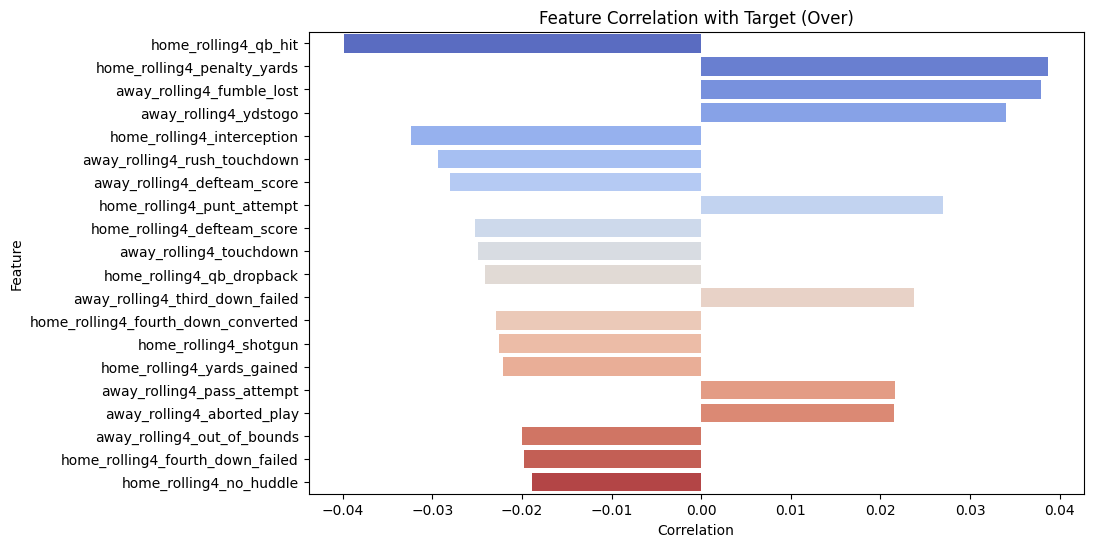

In [ ]:
Xy = X.copy()
Xy['over'] = y
correlations = Xy.corr(numeric_only=True)['over'].drop('over').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title('Feature Correlation with Target (Over)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

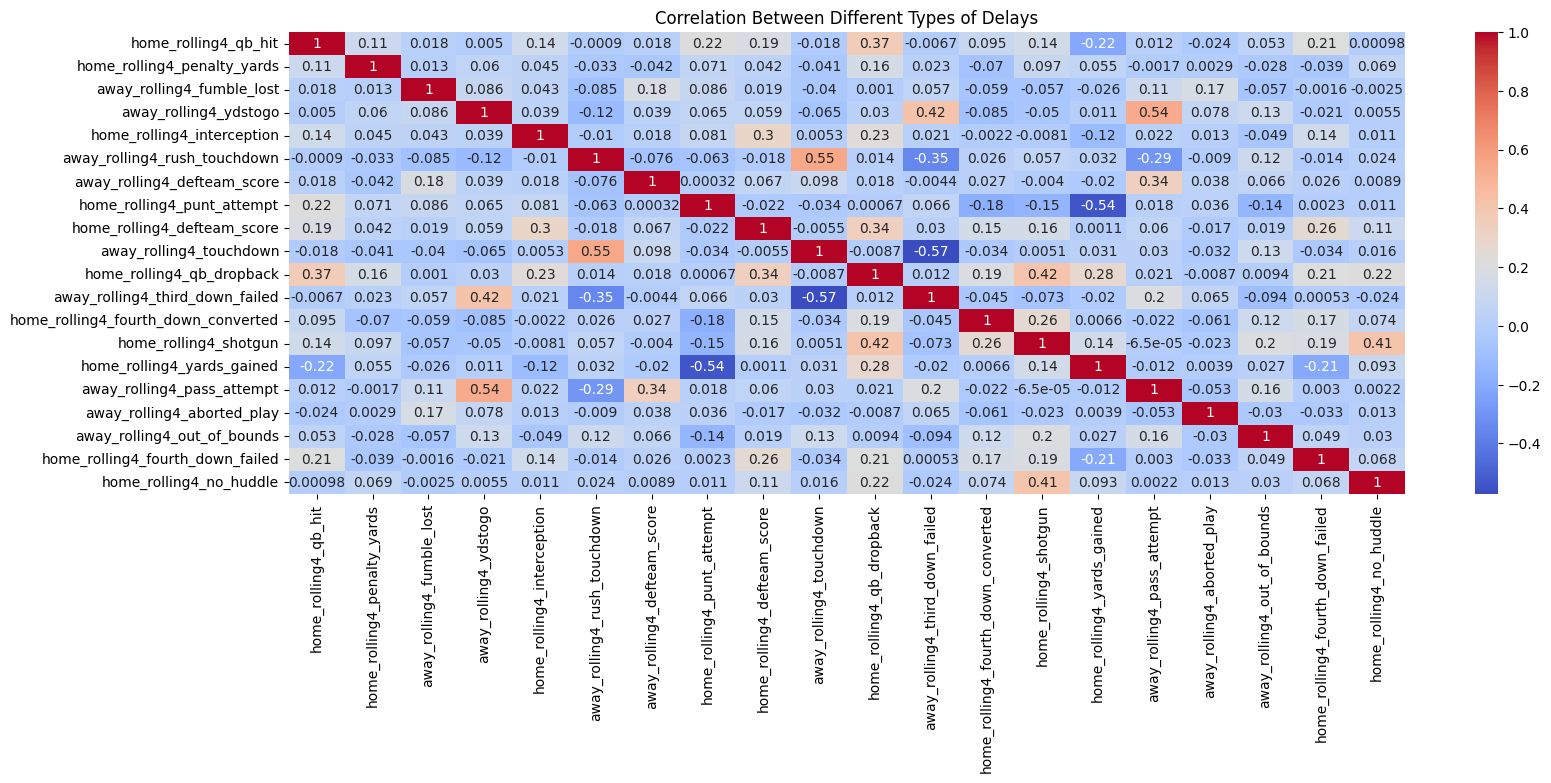

In [ ]:
# plot correlation matrix between delay types
#delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay', 'DepDelay']
plt.figure(figsize=(18, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Types of Delays')
plt.show()

In [ ]:
X

,home_rolling4_qb_hit,home_rolling4_penalty_yards,away_rolling4_fumble_lost,away_rolling4_ydstogo,home_rolling4_interception,away_rolling4_rush_touchdown,away_rolling4_defteam_score,home_rolling4_punt_attempt,home_rolling4_defteam_score,away_rolling4_touchdown,home_rolling4_qb_dropback,away_rolling4_third_down_failed,home_rolling4_fourth_down_converted,home_rolling4_shotgun,home_rolling4_yards_gained,away_rolling4_pass_attempt,away_rolling4_aborted_play,away_rolling4_out_of_bounds,home_rolling4_fourth_down_failed,home_rolling4_no_huddle
62,2.50,67.50,0.50,738.00,1.00,0.75,13.50,6.00,19.25,2.50,32.25,8.50,0.00,23.00,309.50,39.25,0.00,7.25,0.25,1.25
63,5.50,50.00,1.00,621.25,1.50,0.00,17.00,5.25,21.75,1.75,34.25,9.25,1.00,23.00,258.25,34.00,0.00,5.25,1.25,4.00
64,3.75,60.50,0.50,682.50,1.50,0.75,21.25,4.75,13.75,2.25,38.00,8.75,0.00,24.00,306.50,46.50,0.00,5.00,0.50,1.50
65,3.25,71.75,0.75,568.50,0.50,1.00,18.25,5.00,19.75,3.25,32.75,5.75,0.00,12.50,328.25,31.75,0.00,4.75,0.25,0.50
66,7.00,33.00,0.50,618.25,1.00,0.50,27.75,5.50,31.25,2.00,31.50,7.25,0.50,29.50,237.25,31.00,0.00,3.50,1.00,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,4.75,63.00,0.25,572.75,0.25,0.50,14.25,3.75,16.50,1.75,30.75,7.75,1.50,57.00,326.75,31.25,0.00,5.75,0.25,15.50
4074,5.75,33.50,0.75,635.00,0.50,0.50,24.00,1.50,27.00,3.50,41.75,6.75,1.75,36.50,457.75,38.75,0.00,8.50,1.00,4.25
4075,5.75,49.50,0.00,604.25,0.00,1.75,17.25,3.50,19.75,3.25,34.75,7.00,1.00,48.50,268.50,28.00,0.25,4.75,0.75,0.50
4076,4.50,44.50,0.00,640.25,0.00,1.25,23.50,3.75,13.00,3.50,29.00,7.25,1.00,53.25,329.75,36.50,0.00,9.75,0.25,16.25


In [ ]:
print(y.value_counts(normalize=True))

0    0.511964
1    0.488036
Name: over, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=150, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       411
           1       0.49      0.50      0.49       392

    accuracy                           0.50       803
   macro avg       0.50      0.50      0.50       803
weighted avg       0.50      0.50      0.50       803



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

[[196 215]
 [199 193]]
ROC AUC: 0.47898977109091817


In [ ]:
print("Input layer size:", X.shape[1])
len(np.unique(y))

Input layer size: 20


2

In [ ]:
import torch
from torch import nn


class MLP(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(20, 100)
    self.fc2 = nn.Linear(100, 150)
    self.fc3 = nn.Linear(150, 150)
    #self.fc4 = nn.Linear(150, 150)
    #self.fc5 = nn.Linear(150, 150)
    self.fc6 = nn.Linear(150, 2)

    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc6(x)
    return x

  def predict(self, X):
    return torch.argmax(self.forward(X), dim=1)

mlp = MLP()

mlp

MLP(
  (fc1): Linear(in_features=20, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=150, bias=True)
  (fc6): Linear(in_features=150, out_features=2, bias=True)
  (relu): ReLU()
)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

Loss in epoch 499: 0.006464994512498379: 100%|██████████| 500/500 [00:16<00:00, 30.03it/s]


Text(0.5, 1.0, 'Loss / epoch')

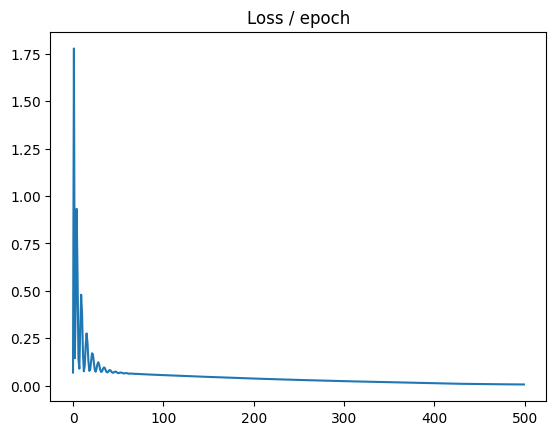

In [ ]:
from tqdm import tqdm

X_all = torch.tensor(X_train_scaled, dtype=torch.float32)
y_all = torch.tensor(y_train.values, dtype=torch.long)
loss_fn = nn.CrossEntropyLoss()

epochs = 150
lr = 0.001
optimizer = torch.optim.Adam(mlp.parameters(), lr=lr)
losses = []

for epoch in (p := tqdm(range(epochs))):
  losses.append(0)
  # forward pass of the MLP (calls forward)
  y_pred = mlp(X_all)
  # compute the loss using the cross entropy loss function
  loss = loss_fn(y_pred, y_all)
  loss.backward()
  losses[-1] += float(loss.to("cpu"))
  optimizer.step()
  optimizer.zero_grad()

  p.set_description(f"Loss in epoch {epoch}: {losses[-1]}")

plt.plot(losses)
plt.title("Loss / epoch")

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Test function
def test_model(model: torch.nn.Module,
               data_loader,
               device="cpu",
               loss_fn=nn.CrossEntropyLoss()):
    model.to(device)
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            batch_size = target.size(0)
            test_loss += loss.item() * batch_size  # sum batch loss correctly
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += batch_size

    avg_loss = test_loss / total
    accuracy = 100. * correct / total

    print(f"\nTest set: Average loss: {avg_loss:.4f}, Accuracy: {correct}/{total} ({accuracy:.2f}%)\n")

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

test_model(mlp, test_loader, device="cpu")


Test set: Average loss: 2.8716, Accuracy: 387/803 (48.19%)



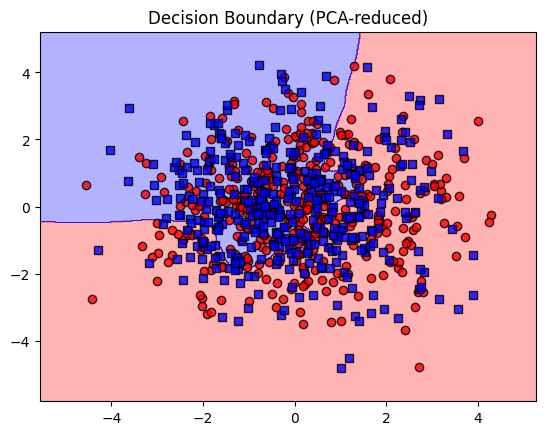

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test_scaled)

# Wrap model with 2D input (optional, if your model handles 20D only)
class TorchModelPCAWrapper:
    def __init__(self, model, pca):
        self.model = model.eval()
        self.pca = pca

    def predict(self, X):
        X_orig_space = self.pca.inverse_transform(X)  # go back to 20D
        X_tensor = torch.tensor(X_orig_space, dtype=torch.float32)
        with torch.no_grad():
            preds = self.model.predict(X_tensor)
        return preds.numpy()

wrapped_model_2d = TorchModelPCAWrapper(mlp, pca)

# Now plot
plot_decision_regions(X_test_2d, y_test.values, classifier=wrapped_model_2d)
plt.title("Decision Boundary (PCA-reduced)")
plt.show()

Testing other models

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       411
           1       0.52      0.47      0.49       392

    accuracy                           0.53       803
   macro avg       0.53      0.53      0.53       803
weighted avg       0.53      0.53      0.53       803



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57       411
           1       0.52      0.45      0.49       392

    accuracy                           0.53       803
   macro avg       0.53      0.53      0.53       803
weighted avg       0.53      0.53      0.53       803



In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       411
           1       0.51      0.39      0.44       392

    accuracy                           0.52       803
   macro avg       0.51      0.51      0.51       803
weighted avg       0.51      0.52      0.51       803

